<a href="https://colab.research.google.com/github/Paula-Bautista/Proyecto-Final/blob/main/Tarea5HC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

1-a. Genere el grafo nx.karate club graph()

In [30]:
np.random.seed(0)
G = nx.karate_club_graph()
Nv = len(G)
matA = 1.0 * nx.adjacency_matrix(G).todense()


In [31]:
matW = np.zeros([Nv, Nv])

In [32]:
for i in range(Nv):
    ki = np.sum(matA[i])
    if ki > 0:
        matW[i, :] = matA[i] / ki
    else:
        matW[i, :] = np.zeros(Nv)

In [33]:
print("N nodos =", Nv)
print("Grado del nodo 0 =", int(np.sum(matA[0])))

N nodos = 34
Grado del nodo 0 = 42


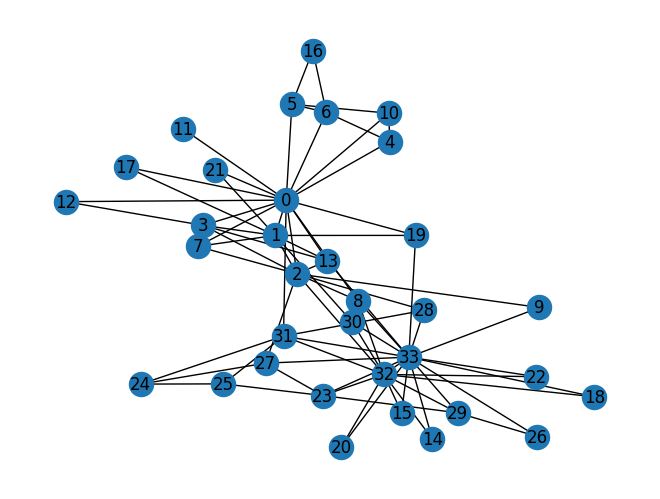

In [34]:
nx.draw(G, with_labels=True)
plt.show()

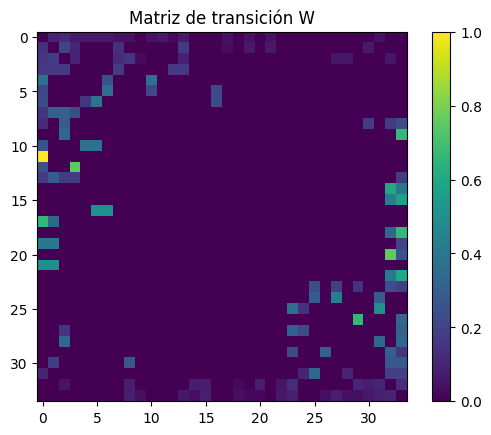

In [35]:
plt.imshow(matW)
plt.title("Matriz de transición W")
plt.colorbar()
plt.show()

1-b Seleccione un nodo inicial i0 y un nodo objetivo j0. Por ejemplo, i0 = 18 j0 = 0 y simule N = 104 realizaciones independientes del caminante aleatorio que inicia en i0 y registre, para cada trayectoria, el numero de pasos  ́ TFP necesarios para alcanzar por primera vez el nodo j0.

In [36]:
np.random.seed(1)

i0 = 18
j0 = 0
Nsim = int(1e4)

In [37]:
def first_passage_time(i_start, j_target, W):
    Nv = W.shape[0]
    nodes = list(range(Nv))
    pos = int(i_start)
    if pos == j_target:
        return 0
    t = 0
    while True:
        t += 1
        pos = np.random.choice(nodes, p=W[pos])
        if pos == j_target:
            return t

In [38]:
T_samples = np.zeros(Nsim, dtype=int)
for r in range(Nsim):
    T_samples[r] = first_passage_time(i0, j0, matW)
    if (r + 1) % 2000 == 0:
        print("Simulaciones completadas:", r + 1)

print("Primeros 10 tiempos de primer paso:", T_samples[:10])


Simulaciones completadas: 2000
Simulaciones completadas: 4000
Simulaciones completadas: 6000
Simulaciones completadas: 8000
Simulaciones completadas: 10000
Primeros 10 tiempos de primer paso: [ 6  9 16  8 12 14  8 47  3 22]


1-c Represente graficamente el histograma de los tiempos de primer paso  ́ ρ(TFP) y calcule su valor medio ⟨TFP⟩MC

In [39]:
np.random.seed(2)
mean_MC = np.mean(T_samples)
print("Media Monte Carlo <T_FP>_MC =", mean_MC)

Media Monte Carlo <T_FP>_MC = 26.0082


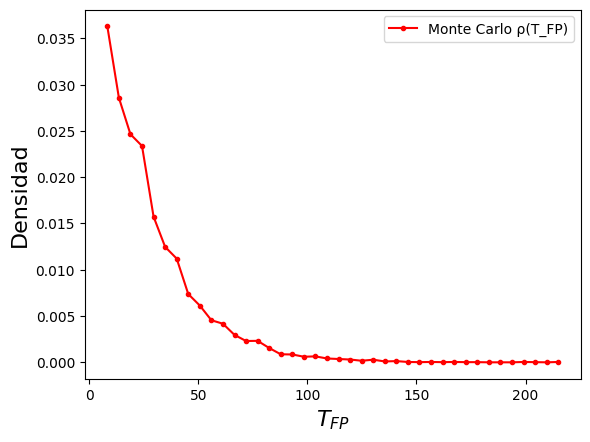

In [40]:
freqs, base = np.histogram(T_samples, bins=40, density=True)
plt.plot(base[1:], freqs, 'r.-', label='Monte Carlo ρ(T_FP)')
plt.xlabel(r'$T_{FP}$', size=16)
plt.ylabel(r'Densidad', size=16)
plt.legend()
plt.show()

1-d Comente brevemente como varía la distribucion de  ́ TFP si se cambia el nodo objetivo j0 hacia zonas perifericas de la red.  ́

In [41]:
degrees = np.sum(matA, axis=1)
j0_perif = int(np.argmin(degrees))
print("Nodo periférico elegido:", j0_perif, "con grado", degrees[j0_perif])
degrees = np.sum(matA, axis=1)
j0_perif = int(np.argmin(degrees))
print("Nodo periférico elegido:", j0_perif, "con grado", degrees[j0_perif])

Nodo periférico elegido: 9 con grado 3.0
Nodo periférico elegido: 9 con grado 3.0


Si el objetivo j0 está en un nodo periférico (grado bajo), los tiempos de primer paso suelen ser más largos y la distribución más dispersa: la media aumenta y puede haber una cola más gruesa. En cambio, si j0 es un nodo muy conectado (central), es más fácil alcanzarlo, y los tiempos medios y la varianza tienden a ser menores.

## 2.
______________________________________________________________________________________________________________________________________________________________

2-a Defina la submatriz Q de tamano ̃ (N − 1) × (N − 1) obtenida al eliminar de W la fila y la columna asociadas al nodo absorbente

In [42]:
G = nx.karate_club_graph()
Nv = len(G)
matA = 1.0 * nx.adjacency_matrix(G).todense()

In [43]:
matW = np.zeros((Nv, Nv))
for i in range(Nv):
    ki = np.sum(matA[i])
    if ki > 0:
        matW[i, :] = matA[i] / ki

In [44]:
def Q_from_W_and_j(W, j):
    N = W.shape[0]
    indices = [i for i in range(N) if i != j]
    Q = W[np.ix_(indices, indices)]
    return Q, indices
j_example = 0
Q_example, idxs = Q_from_W_and_j(matW, j_example)
print("Q_example shape:", Q_example.shape)

Q_example shape: (33, 33)


2-b Resuelva el sistema anterior numericamente para obtener  ́ t
(j) e inserte t (j) j = 0 para completar la matriz de tiempos medios T de tamano ̃ N × N, donde el elemento Tij representa el tiempo medio de primer paso desde i hasta j.

In [45]:
def t_for_absorbent_j(W, j):
    Q, indices = Q_from_W_and_j(W, j)
    I = np.eye(Q.shape[0])
    b = np.ones(Q.shape[0])
    t_reduced = np.linalg.solve(I - Q, b)

    t_full = np.zeros(W.shape[0])
    for k, node in enumerate(indices):
        t_full[node] = t_reduced[k]
    t_full[j] = 0.0
    return t_full
j0 = 0
t_j0 = t_for_absorbent_j(matW, j0)
print(f"t^(j={j0}) (primeros 10 valores):\n", t_j0[:10])


t^(j=0) (primeros 10 valores):
 [ 0.         12.30834786 15.1135176  11.46772473  3.79923012  4.88403705
  4.8125827  12.08389508 19.77712009 22.61806968]


2-c Genere la matriz completa de tiempos medios de primer paso T calculando t (j) para cada posible nodo absorbente j. Visualice el resultado mediante un mapa de calor y discuta que nodos son  mas accesibles (peque  ́ nos  ̃ Tij ) o mas difíciles de alcanzar.

In [46]:
Nv = matW.shape[0]
T = np.zeros((Nv, Nv))

for j in range(Nv):
    T[:, j] = t_for_absorbent_j(matW, j)

print("T shape:", T.shape)
print("Ejemplo T[:5, :5]:\n", np.round(T[:5, :5], 3))

T shape: (34, 34)
Ejemplo T[:5, :5]:
 [[ 0.    17.018 13.947 30.193 74.951]
 [12.308  0.    11.009 27.613 87.26 ]
 [15.114 16.885  0.    30.658 90.065]
 [11.468 13.597 10.765  0.    86.419]
 [ 3.799 20.817 17.746 33.993  0.   ]]


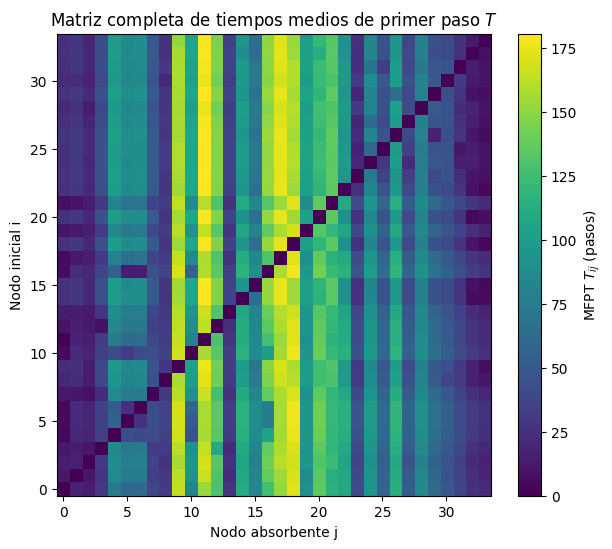

In [47]:
plt.figure(figsize=(7,6))
plt.imshow(T, origin='lower', interpolation='nearest', aspect='auto')
plt.colorbar(label='MFPT $T_{ij}$ (pasos)')
plt.xlabel('Nodo absorbente j')
plt.ylabel('Nodo inicial i')
plt.title('Matriz completa de tiempos medios de primer paso $T$')
plt.show()

In [49]:
col_means = np.mean(T, axis=0)
order_easy = np.argsort(col_means)
print("5 nodos más accesibles (menor media):", order_easy[:5], "con medias:", np.round(col_means[order_easy[:5]],2))
print("5 nodos más difíciles (mayor media):", order_easy[-5:], "con medias:", np.round(col_means[order_easy[-5:]],2))

degrees = np.sum(matA, axis=1)
print("Grados de los 5 más accesibles:", degrees[order_easy[:5]])
print("Grados de los 5 más difíciles:", degrees[order_easy[-5:]])

5 nodos más accesibles (menor media): [33  2  0 32  1] con medias: [14.36 16.76 16.9  18.92 22.32]
5 nodos más difíciles (mayor media): [12  9 18 17 11] con medias: [134.55 155.4  159.69 160.66 165.37]
Grados de los 5 más accesibles: [48. 33. 42. 38. 29.]
Grados de los 5 más difíciles: [4. 3. 3. 3. 3.]


In [50]:
i0 = 18
j0 = 0
T_theoretical = T
T_i0j0 = T_theoretical[i0, j0]
print(f"Valor teórico T[{i0},{j0}] = {T_i0j0:.3f} pasos")

try:
    mean_MC = np.mean(T_samples)
    Nsim_used = len(T_samples)
    print(f"Usando T_samples existente (Nsim = {Nsim_used}), media Monte Carlo ⟨T_FP⟩_MC = {mean_MC:.3f}")
except NameError:
    print("T_samples no encontrado. Recalculando una aproximación Monte Carlo rápida (Nsim_small = 5000)...")
    Nsim_small = 5000

Valor teórico T[18,0] = 26.129 pasos
Usando T_samples existente (Nsim = 10000), media Monte Carlo ⟨T_FP⟩_MC = 26.008


In [52]:
Nsim_small = 5000 # Define Nsim_small here to ensure it's always available

def first_passage_time(i_start, j_target, W):
    Nv = W.shape[0]
    nodes = list(range(Nv))
    pos = int(i_start)
    if pos == j_target:
        return 0
    t = 0
    while True:
        t += 1
        pos = np.random.choice(nodes, p=W[pos])
        if pos == j_target:
            return t
T_samples_small = np.array([first_passage_time(i0, j0, matW) for _ in range(Nsim_small)])
mean_MC = np.mean(T_samples_small)
print(f"Media Monte Carlo aproximada (Nsim = {Nsim_small}) = {mean_MC:.3f}")

Media Monte Carlo aproximada (Nsim = 5000) = 25.902


In [ ]:
diff = mean_MC - T_i0j0
rel_error = diff / T_i0j0 if T_i0j0 != 0 else np.nan
print(f"Diferencia MC - teórico = {diff:.3f}  (error relativo = {rel_error:.3f})")

Las diferencias entre el valor medio ⟨TFP⟩ obtenido por Monte Carlo y el tiempo teórico Ti0j0T_{i_0 j_0}Ti0​j0​​ se deben principalmente a la naturaleza estocástica de la simulación y a los errores numéricos del cálculo matricial. El método Monte Carlo produce fluctuaciones porque cada trayectoria del caminante es aleatoria, por lo que el promedio depende del número de realizaciones y presenta variabilidad estadística. Por su parte, el método analítico entrega el valor esperado exacto en el modelo, pero puede incluir pequeñas imprecisiones numéricas al resolver el sistema lineal. En general, ambos resultados deben ser consistentes, aunque con ligeras discrepancias por estas razones.